In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install scikit-optimize
from google.colab import drive
drive.mount('/content/drive')
!pwd
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
# =============================================================================
# Heston call price using Monte-Carlo
# =============================================================================
def HestonCall(S0, Nmc, K, T, r, k, p, N, Theta, Etha, v0):
    dt = T / N
    V = np.zeros((N, Nmc))
    V[0, :] = v0
    Vsym = np.zeros((N, Nmc))
    Vsym[0, :] = v0
    S = np.zeros((N, Nmc))
    S[0, :] = S0
    Ssym = np.zeros((N, Nmc))
    Ssym[0, :] = S0
    Time = np.linspace(0, T, N)
    A = 0
    M = 0
    LogReturn = np.zeros(Nmc)

    # Generate random samples in one go
    B = np.random.normal(size=(N - 1, Nmc))
    Z = np.random.normal(size=(N - 1, Nmc))

    for i in range(N - 1):
        V[i + 1, :] = V[i, :] + k * (Theta - V[i, :]) * dt + (Etha) * np.sqrt(V[i, :]) * np.sqrt(dt) * B[i, :] + 0.25 * (Etha) ** 2 * dt * (B[i, :] ** 2 - 1)
        S[i + 1, :] = S[i, :] * np.exp((r - 0.5 * V[i, :]) * dt + np.sqrt(V[i, :]) * (p * np.sqrt(dt) * B[i, :] + np.sqrt(1 - p ** 2) * np.sqrt(dt) * Z[i, :]))
        Vsym[i + 1, :] = Vsym[i, :] + k * (Theta - Vsym[i, :]) * dt + (Etha) * np.sqrt(Vsym[i, :]) * np.sqrt(dt) * (-B[i, :]) + 0.25 * (Etha) ** 2 * dt * (B[i, :] ** 2 - 1)
        Ssym[i + 1, :] = Ssym[i, :] * np.exp((r - 0.5 * Vsym[i, :]) * dt + np.sqrt(Vsym[i, :]) * (p * np.sqrt(dt) * -B[i, :] + np.sqrt(1 - p ** 2) * np.sqrt(dt) * -Z[i, :]))

    payoffUs = np.maximum(S[-1, :] - K, 0)
    payoff = np.maximum(S[-1, :] - K, 0) + np.maximum(Ssym[-1, :] - K, 0)
    LogReturn = np.log(S[-1, :] / S0)
    A = np.sum(payoff)
    M = np.sum(payoffUs)

    CallRed = 0.5 * np.exp(-r * (T)) * A / Nmc
    Call = np.exp(-r * (T)) * M / Nmc

    return CallRed, Call, LogReturn, V, S

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


In [4]:
num_values = 100000
N=100
Nmc=20000

# Generate the values for each variable
S_values = np.random.uniform(5, 20, num_values)
r_values = np.random.uniform(0.01, 0.1, num_values)
k_values = np.random.uniform(0.1, 10, num_values)
v0_values=np.random.uniform(0.01,0.1, num_values)
Theta_values=np.random.uniform(0.1,0.6, num_values)
Etha_values=np.random.uniform(0.1,0.8, num_values)
p_values=np.random.uniform(-0.8,0.8, num_values)
K_values = np.random.uniform(0, 40, num_values)
T_values = np.random.uniform(0.5, 1.5, num_values)

# Create a dictionary with variable names as keys and generated values as values
data = {
    'S': np.random.permutation(S_values),
    'r': np.random.permutation(r_values),
    'k': np.random.permutation(k_values),
    'v0': np.random.permutation(v0_values),
    'Theta': np.random.permutation(Theta_values),
    'Etha': np.random.permutation(Etha_values),
    'p': np.random.permutation(p_values),
    'K': np.random.permutation(K_values),
    'T': np.random.permutation(T_values),
}

# Create the DataFrame
df = pd.DataFrame(data)

# Print the resulting DataFrame
df.head()


,S,r,k,v0,Theta,Etha,p,K,T
0,10.717678,0.073028,7.741038,0.095806,0.556187,0.358238,0.413867,15.554184,0.569630
1,8.654284,0.081522,3.555550,0.022262,0.364459,0.395794,0.265425,11.538573,0.580189
2,7.533709,0.015424,8.648593,0.053967,0.386799,0.660265,-0.604517,32.646894,0.967454
3,17.705093,0.074288,7.872488,0.014740,0.591322,0.144636,0.289300,22.984612,1.478669
4,13.532664,0.047299,5.315395,0.080064,0.599938,0.117991,0.773950,7.587352,1.179766


In [ ]:

# Define a function to extract the first output of HestonCall
def get_first_output(row):
    outputs = HestonCall(row['S'], Nmc, row['K'], row['T'], row['r'], row['k'], row['p'], N, row['Theta'], row['Etha'], row['v0'])
    return outputs[0]

# Apply the function to create the 'Price' column
df['Price'] = df.apply(get_first_output, axis=1)

# Print the resulting DataFrame
print(df.head())

<ipython-input-2-cb9e2a30d83e>:29: RuntimeWarning: invalid value encountered in sqrt
  V[i + 1, :] = V[i, :] + k * (Theta - V[i, :]) * dt + (Etha) * np.sqrt(V[i, :]) * np.sqrt(dt) * B[i, :] + 0.25 * (Etha) ** 2 * dt * (B[i, :] ** 2 - 1)
<ipython-input-2-cb9e2a30d83e>:30: RuntimeWarning: invalid value encountered in sqrt
  S[i + 1, :] = S[i, :] * np.exp((r - 0.5 * V[i, :]) * dt + np.sqrt(V[i, :]) * (p * np.sqrt(dt) * B[i, :] + np.sqrt(1 - p ** 2) * np.sqrt(dt) * Z[i, :]))
<ipython-input-2-cb9e2a30d83e>:31: RuntimeWarning: invalid value encountered in sqrt
  Vsym[i + 1, :] = Vsym[i, :] + k * (Theta - Vsym[i, :]) * dt + (Etha) * np.sqrt(Vsym[i, :]) * np.sqrt(dt) * (-B[i, :]) + 0.25 * (Etha) ** 2 * dt * (B[i, :] ** 2 - 1)
<ipython-input-2-cb9e2a30d83e>:32: RuntimeWarning: invalid value encountered in sqrt
  Ssym[i + 1, :] = Ssym[i, :] * np.exp((r - 0.5 * Vsym[i, :]) * dt + np.sqrt(Vsym[i, :]) * (p * np.sqrt(dt) * -B[i, :] + np.sqrt(1 - p ** 2) * np.sqrt(dt) * -Z[i, :]))


           S         r         k        v0     Theta      Etha         p  \
0  12.076873  0.083666  6.656070  0.041651  0.203229  0.246359 -0.669346   
1  17.907535  0.012300  9.890146  0.071846  0.182916  0.123772  0.752409   
2  16.104638  0.020101  2.192182  0.034322  0.590979  0.736187  0.195012   
3  13.012423  0.070219  4.139042  0.048861  0.355449  0.571692  0.730487   
4  10.784495  0.065652  5.451565  0.012692  0.508316  0.412797 -0.001660   

           K         T      Price  
0  34.386440  1.208594   0.057511  
1  29.358595  0.618244   0.205042  
2  30.957844  0.820102   0.664572  
3   2.305313  1.485523  10.904327  
4  35.600934  0.784281   0.069473  


In [5]:
df=pd.read_csv('drive/My Drive/Colab Notebooks/PriceTable.csv',index_col=0)
df.head()
# Count the number of NaN values in the 'Price' column
num_nan = df['Price'].isnull().sum()
print("Number of NaN values in 'Price' column:", num_nan)

# Drop rows with NaN values in the 'Price' column
df.dropna(subset=['Price'], inplace=True)
df.head()

Number of NaN values in 'Price' column: 0


,S,r,k,v0,Theta,Etha,p,K,T,Price
0,14.510912,0.092470,8.973674,0.029911,0.322894,0.296942,0.505395,12.586655,0.981349,4.407969
1,6.420537,0.048277,3.935471,0.044169,0.591598,0.133458,0.214351,32.854363,0.641299,0.001294
2,9.780157,0.050376,4.972602,0.098607,0.226699,0.381960,0.021103,12.532442,0.588989,0.543917
3,6.227517,0.030420,1.726650,0.049743,0.364584,0.401500,0.254602,30.428077,1.096197,0.004332
4,16.557066,0.027218,6.645216,0.072864,0.342980,0.154687,0.128630,16.025570,0.805095,3.527113


In [51]:
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.layers import Dense,BatchNormalization
from keras.optimizers import Adam
from scipy.stats import norm
y=df['Price']
X=df.drop('Price',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
assert not np.any(np.isnan(X))
# # Create a StandardScaler object
scaler = StandardScaler()

# # Fit the scaler on the training data
scaler.fit(X_train)

# # Apply the scaler to transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
import tensorflow as tf
# # Define the custom loss function
# def custom_loss(y_true, y_pred, model_trainable_vars):
#     mse_loss = tf.reduce_mean(tf.square(y_true - y_pred))

#     # Calculate the squared L2 norm of the gradients of the predicted price
#     # with respect to the trainable variables to enforce smoothness
#     gradients = tf.gradients(y_pred, model_trainable_vars)
#     gradients_squared_norm = tf.reduce_sum([tf.reduce_sum(tf.square(g)) for g in gradients])

#     # Adjust the weight of the smoothness term with lambda_reg
#     lambda_reg = 0.0001
#     loss = mse_loss + lambda_reg * gradients_squared_norm
#     return loss

from keras.callbacks import EarlyStopping

# Define the EarlyStopping callback based on training loss
early_stopping = EarlyStopping(monitor='loss', patience=10)

# Create and compile the model
Model = Sequential()
learning_rate = 0.002
optimizer = Adam(learning_rate=learning_rate, clipvalue=1.0)
from keras import regularizers
from keras.layers import Dropout
Model.add(Dense(32, input_dim=X.shape[1], activation='elu'))
Model.add(Dense(30, activation='elu'))
Model.add(Dense(30, activation='elu'))
Model.add(Dense(30, activation='elu'))
Model.add(Dense(1, activation='elu'))
# Get the trainable variables of the model
model_trainable_vars = Model.trainable_variables
Model.compile(loss='mean_squared_error', optimizer=optimizer)

# Train the model with EarlyStopping callback based on training loss
Model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, callbacks=[early_stopping])

# Predict on the test data
y_pred = Model.predict(X_test_scaled)
# Check for NaN values in X_train_scaled
has_nan_X_train = np.isnan(X_train_scaled)
print("NaN values in X_train_scaled:", np.any(has_nan_X_train))

# Check for NaN values in y_train
has_nan_y_train = np.isnan(y_train)
print("NaN values in y_train:", np.any(has_nan_y_train))

Epoch 1/500
2460/2460 [==============================] - 10s 3ms/step - loss: 0.3379
Epoch 2/500
2460/2460 [==============================] - 7s 3ms/step - loss: 0.0196
Epoch 3/500
2460/2460 [==============================] - 6s 2ms/step - loss: 0.0133
Epoch 4/500
2460/2460 [==============================] - 8s 3ms/step - loss: 0.0106
Epoch 5/500
2460/2460 [==============================] - 6s 3ms/step - loss: 0.0102
Epoch 6/500
2460/2460 [==============================] - 8s 3ms/step - loss: 0.0077
Epoch 7/500
2460/2460 [==============================] - 6s 2ms/step - loss: 0.0066
Epoch 8/500
2460/2460 [==============================] - 8s 3ms/step - loss: 0.0068
Epoch 9/500
2460/2460 [==============================] - 6s 3ms/step - loss: 0.0060
Epoch 10/500
2460/2460 [==============================] - 8s 3ms/step - loss: 0.0054
Epoch 11/500
2460/2460 [==============================] - 6s 2ms/step - loss: 0.0059
Epoch 12/500
2460/2460 [==============================] - 8s 3ms/step - l

In [52]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R-squared for Neural Network Pricing function
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R-squared:", r2)
print("RMSE:", rmse)

R-squared: 0.9999241727475229
RMSE: 0.035919348051565644


0.6697761253898593
0.41107154273472307
-0.1857636659364332


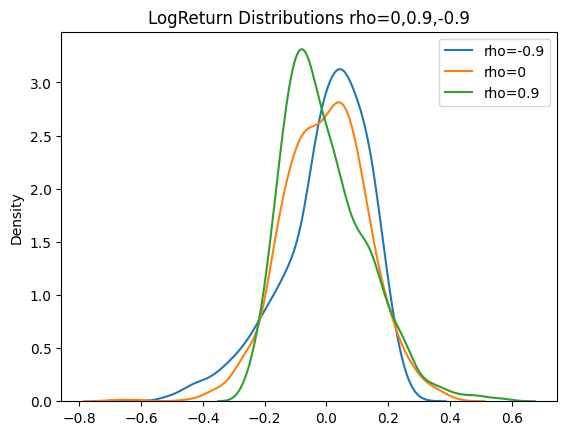

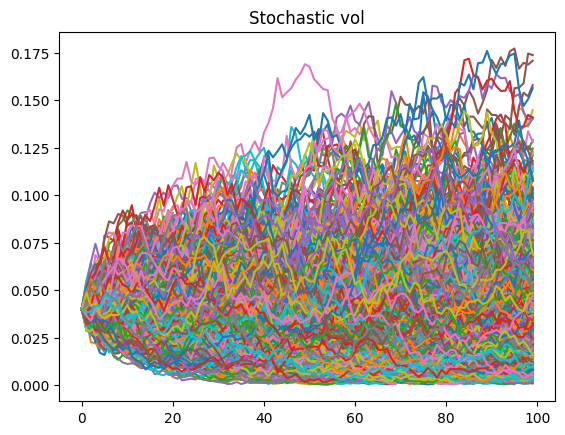

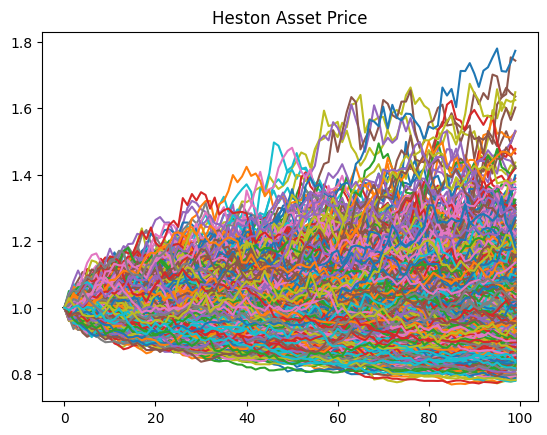

0.07904378772096504
0.4625305724609058
-1.1423410121655377
0.4709224391719749
-0.5756015989766542
-1.1935174971249563
-0.1635484314271929
-0.15228284799075756
1.1926781807379339
-0.49274830635097805
1.2458766198428766
-1.8123939013589943
-0.24135817036154866
0.5748789158398424
-1.189671195366052
0.7385626669827083
0.110947433661371
-1.234902387326669
0.8271944876527744
-0.538716900848678
1.9422826149759784
-1.4886545560561255
0.3247855303576926
-2.7142629752448637
0.4940151196282003
-1.1164286365775566
0.3779758641776466
0.9217984888169438
0.2805843770110177
-0.10439648355551569
-1.1026973592105709
0.2908031525333752
0.47385075604630716
2.2522763340327296
-0.5207672457586192
-0.03844518164324475
0.8174830622003686
-0.6701370175622017
0.5672679752760877
-0.22997498610362446
-0.4447526937909422
-0.3099690963698817
1.217016023970777
1.3563153533372927
-1.9954560423501924
1.4917848761985275
-0.1627043781449851
-0.923071451070128
1.8174077252113123
0.7115139183325221
-0.0070396171637666935


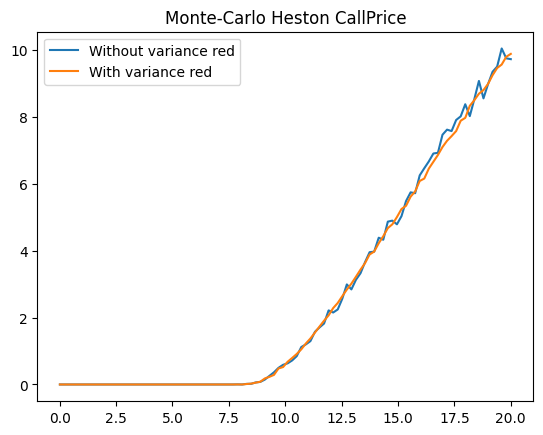

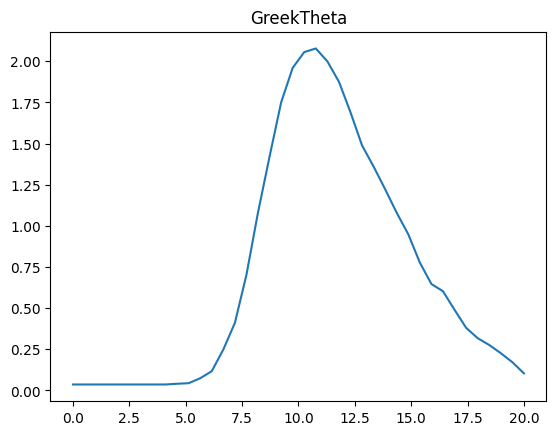

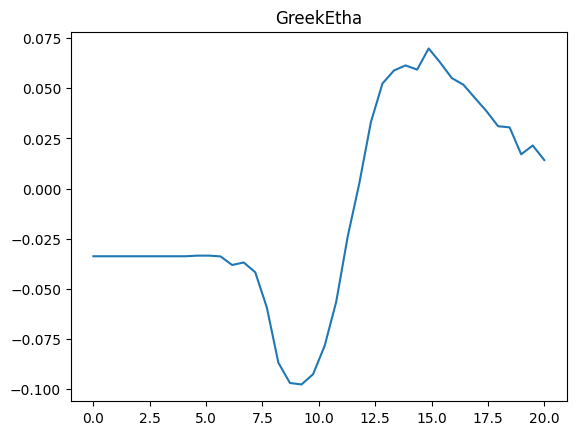

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
# =============================================================================
# Heston call price using Monte-Carlo
# =============================================================================
def HestonCall(S0,Nmc,K,T,r,k,p,N,Theta,Etha,v0):
    dt=T/N
    V=np.zeros((N,Nmc))
    V[0,:]=v0
    Vsym=np.zeros((N,Nmc))
    Vsym[0,:]=v0
    S=np.zeros((N,Nmc))
    S[0,:]=S0
    Ssym=np.zeros((N,Nmc))
    Ssym[0,:]=S0
    Time=np.linspace(0,T,N)
    A=0
    M=0
    LogReturn=np.zeros(Nmc)
    for j in range(Nmc):
        for i in range(N-1):
           B=np.random.normal()
           Z=np.random.normal()
           V[i+1][j]=V[i][j]+k*(Theta-V[i][j])*dt+(Etha)*np.sqrt(V[i][j])*np.sqrt(dt)*B+0.25*(Etha)**2*dt*(B**2-1)
           S[i+1][j]=S[i][j]*np.exp((r-0.5*V[i][j])*dt+np.sqrt(V[i][j])*(p*np.sqrt(dt)*B+np.sqrt(1-p**2)*np.sqrt(dt)*Z))
           Vsym[i+1][j]=Vsym[i][j]+k*(Theta-Vsym[i][j])*dt+(Etha)*np.sqrt(Vsym[i][j])*np.sqrt(dt)*-B+0.25*(Etha)**2*dt*(B**2-1)
           Ssym[i+1][j]=Ssym[i][j]*np.exp((r-0.5*Vsym[i][j])*dt+np.sqrt(Vsym[i][j])*(p*np.sqrt(dt)*-B+np.sqrt(1-p**2)*np.sqrt(dt)*-Z))

        payoffUs=np.maximum(S[-1][j]-K,0)
        payoff=np.maximum(S[-1][j]-K,0)+np.maximum(Ssym[-1][j]-K,0)
        LogReturn[j]=np.log(S[-1][j]/S0)
        A+=payoff
        M+=payoffUs
    CallRed=0.5*np.exp(-r*(T))*A/Nmc
    Call=np.exp(-r*(T))*M/Nmc
    print(B)
    return CallRed,Call,LogReturn,V,S
S0,Nmc,K,T,r,k,p,N,Theta,Etha,v0=1,1000,1,0.5,0.01,2,-0.9,100,0.04,0.3,0.04
Values=[-0.9,0,0.9]
for i in range(3):
    S0,Nmc,K,T,r,k,p,N,Theta,Etha,v0=1,1000,1,0.5,0.01,2,Values[i],100,0.04,0.3,0.04
    _,_,LogReturn,V,S=HestonCall(S0,Nmc,K,T,r,k,Values[i],N,Theta,Etha,v0)
    sns.kdeplot(LogReturn,label='rho={}'.format(Values[i]))
plt.legend()
plt.title('LogReturn Distributions rho=0,0.9,-0.9')
plt.show()
plt.plot(V)
plt.title('Stochastic vol')
plt.show()
plt.plot(S)
plt.title('Heston Asset Price')
plt.show()
Start=np.linspace(0.01,20,100)
CallPriceReduced=np.zeros(100)
CallPrice=np.zeros(100)
for i in range(100):
    CallRed,Call,_,_,_=HestonCall(Start[i],100,10,0.5,0.01,2,-0.9,100,0.04,0.3,0.04)
    CallPriceReduced[i]=CallRed
    CallPrice[i]=Call

plt.plot(Start,CallPrice,label='Without variance red')
plt.plot(Start,CallPriceReduced,label='With variance red')
plt.title("Monte-Carlo Heston CallPrice")
plt.legend()
plt.show()
def HestonCallGreek(S0,Nmc,K,T,r,k,p,N,Theta,Etha,v0,B,Z):
    dt=T/N
    V=np.zeros((N,Nmc))
    V[0,:]=v0
    Vsym=np.zeros((N,Nmc))
    Vsym[0,:]=v0
    S=np.zeros((N,Nmc))
    S[0,:]=S0
    Ssym=np.zeros((N,Nmc))
    Ssym[0,:]=S0
    Time=np.linspace(0,T,N)
    A=0
    M=0
    LogReturn=np.zeros(Nmc)
    for j in range(Nmc):
        for i in range(N-1):
           V[i+1][j]=V[i][j]+k*(Theta-V[i][j])*dt+(Etha)*np.sqrt(V[i][j])*np.sqrt(dt)*B[i][j]+0.25*(Etha)**2*dt*(B[i][j]**2-1)
           S[i+1][j]=S[i][j]*np.exp((r-0.5*V[i][j])*dt+np.sqrt(V[i][j])*(p*np.sqrt(dt)*B[i][j]+np.sqrt(1-p**2)*np.sqrt(dt)*Z[i][j]))
           Vsym[i+1][j]=Vsym[i][j]+k*(Theta-Vsym[i][j])*dt+(Etha)*np.sqrt(Vsym[i][j])*np.sqrt(dt)*-B[i][j]+0.25*(Etha)**2*dt*(B[i][j]**2-1)
           Ssym[i+1][j]=Ssym[i][j]*np.exp((r-0.5*Vsym[i][j])*dt+np.sqrt(Vsym[i][j])*(p*np.sqrt(dt)*-B[i][j]+np.sqrt(1-p**2)*np.sqrt(dt)*-Z[i][j]))

        payoffUs=np.maximum(S[-1][j]-K,0)
        payoff=np.maximum(S[-1][j]-K,0)+np.maximum(Ssym[-1][j]-K,0)
        LogReturn[j]=np.log(S[-1][j]/S0)
        A+=payoff
        M+=payoffUs
    CallRed=0.5*np.exp(-r*(T))*A/Nmc
    Call=np.exp(-r*(T))*M/Nmc
    return CallRed
def HestonTheta(S0,Nmc,K,T,r,k,p,N,Theta,Etha,v0,h,B,Z):
    Call=HestonCallGreek(S0,Nmc,K,T,r,k,p,N,Theta+h,Etha,v0,B,Z)
    Call2=HestonCallGreek(S0,Nmc,K,T,r,k,p,N,Theta-h,Etha,v0,B,Z)
    GreekTheta=0.5*(Call-Call2)/h
    return GreekTheta
def HestonEtha(S0,Nmc,K,T,r,k,p,N,Theta,Etha,v0,h,B,Z):
    Call=HestonCallGreek(S0,Nmc,K,T,r,k,p,N,Theta,Etha+h,v0,B,Z)
    Call2=HestonCallGreek(S0,Nmc,K,T,r,k,p,N,Theta,Etha-h,v0,B,Z)
    GreekEtha=0.5*(Call-Call2)/h
    return GreekEtha
Number=40
Nmc=500
N=100
Strikes=np.linspace(0,20,Number)
Thetaplot=np.zeros(Number)
Ethaplot=np.zeros(Number)
B=np.random.normal(0,1,size=(N,Nmc))
Z=np.random.normal(0,1,size=(N,Nmc))
for i in range(Number):
    Thetaplot[i]=HestonTheta(10,Nmc,Strikes[i],0.5,0.1,3,0.5,100,0.2,0.5,0.04,0.01,B,Z)
    Ethaplot[i]=HestonEtha(10,Nmc,Strikes[i],0.5,0.1,3,0.5,100,0.2,0.5,0.04,0.01,B,Z)
plt.plot(Strikes,Thetaplot)
plt.title('GreekTheta')
plt.show()
plt.plot(Strikes,Ethaplot)
plt.title('GreekEtha')
plt.show()

def LevenbergMarquardt(Nmc,N):
    k=3
    epsilon=10**(-4)
    v0=0.04
    p=0.5
    Strike=[8+0.4*i for i in range(21)]
    MarketPrices=[2.0944,1.7488,1.4266,1.1456,0.8919,0.7068,0.5461,0.4187,0.3166,0.2425,0.1860,0.1370,0.0967,0.0715,0.0547,0.0381,0.0306,0.0239,0.0163,0.0139,0.086]
    Theta=0.2
    Etha=0.5
    d=[1,1]
    lamb=0.01
    res=np.zeros(len(Strike))
    J=np.zeros((len(Strike),2))
    HestonPrices=np.zeros(len(Strike))
    B=np.random.normal(0,1,size=(N,Nmc))
    Z=np.random.normal(0,1,size=(N,Nmc))
    count=0
    while np.linalg.norm(d,2)>epsilon:
        for i in range(len(Strike)):
            Call=HestonCallGreek(10,Nmc,Strike[i],0.5,0.01,k,p,N,Theta,Etha,v0,B,Z)
            HestonPrices[i]=Call
            res[i]=MarketPrices[i]-HestonPrices[i]
            J[i,0]=-HestonTheta(10,Nmc,Strike[i],0.5,0.01,k,p,N,Theta,Etha,v0,0.01,B,Z)
            J[i,1]=-HestonEtha(10,Nmc,Strike[i],0.5,0.01,k,p,N,Theta,Etha,v0,0.01,B,Z)
        M=(np.dot(J.T,J)+lamb*np.identity(2))
        d=-np.dot(np.linalg.inv(M),J.T).dot(res.reshape((len(Strike),1)))
        Theta+=d[0]
        Etha+=d[1]
        print(Theta)
        print(Etha)
        print(res)
        print(d)
        count+=1
        print(count)
        if Theta>1 or Theta<0:
            Theta=0.2
        if Etha>1 or Etha<0:
            Etha=0.5
    return Theta,Etha
def Call_BS(t,S,K,T,r,sigma):
    d1=(np.log(S/K)+(r+0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))
    d2=(np.log(S/K)+(r-0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))

    if t==T:
        return (np.max(S-K,0))
    else:

        return(S*norm.cdf(d1)-K*np.exp(-r*(T-t))*norm.cdf(d2))


def Vega(t,S,K,T,r,sigma):
    d1=(np.log(S/K)+(r+0.5*sigma**2)*(T-t))/(sigma*np.sqrt(T-t))
    return S*np.sqrt(T-t)/np.sqrt(2*np.pi)*np.exp(-d1**2/2)

def NewtonAlgorithm(Nmc,N):
    k=0.3
    p=0.7
    Theta=0.3
    Etha=0.4
    Strike=np.linspace(5,20,50)
    B=np.random.normal(0,1,size=(N,Nmc))
    Z=np.random.normal(0,1,size=(N,Nmc))
    Call=np.zeros(len(Strike))
    S0=10
    T=0.5
    r=0.1
    v0=0.03
    F=np.zeros(len(Strike))
    Hestonsmile=np.zeros(len(Strike))
    for i in range(len(Strike)):
        Call[i]=HestonCallGreek(10,Nmc,Strike[i],T,r,k,p,N,Theta,Etha,v0,B,Z)
        sigma=np.sqrt(2*np.abs((np.log(S0/Strike[i])+r*T)/T))
        if np.maximum(S0-Strike[i]*np.exp(-r*T),0)<Call[i]<S0:
            while np.abs(Call_BS(0,10,Strike[i],T,r,sigma)-Call[i])>0.001:
                F[i]=Call_BS(0,10,Strike[i],T,r,sigma)-Call[i]
                sigma=sigma-F[i]/Vega(0,S0,Strike[i],T,r,sigma)
        else:
            sigma=0
        print(sigma)
        Hestonsmile[i]=sigma
    plt.plot(Strike,Hestonsmile)
    plt.title("Heston volatility smile")
    plt.show()

In [9]:
def NeuralTheta(S0, K, T, r, k, p,  Theta, Etha, v0, h):
    X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
    Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
    X_scaled=scaler.transform(X)
    Y_scaled=scaler.transform(Y)

    Call = Model.predict([X_scaled])
    Call2 = Model.predict([Y_scaled])
    GreekTheta = (Call - Call2) / (2 * h)
    return GreekTheta

def NeuralEtha(S0,  K, T, r, k, p,  Theta, Etha, v0, h):
    X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
    Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
    X_scaled=scaler.transform(X)
    Y_scaled=scaler.transform(Y)

    Call = Model.predict([X_scaled])
    Call2 = Model.predict([Y_scaled])
    GreekEtha = (Call - Call2) / (2 * h)
    return GreekEtha

In [28]:
def LevenbergMarquardtNeural(h):
    k=3
    epsilon=10**(-4)
    v0=0.04
    p=0.5
    Strike=[8+0.4*i for i in range(21)]
    MarketPrices=[2.0944,1.7488,1.4266,1.1456,0.8919,0.7068,0.5461,0.4187,0.3166,0.2425,0.1860,0.1370,0.0967,0.0715,0.0547,0.0381,0.0306,0.0239,0.0163,0.0139,0.086]
    Theta=0.2
    Etha=0.3
    d=[1,1]
    lamb=0.01
    res=np.zeros(len(Strike))
    J=np.zeros((len(Strike),2))
    HestonPrices=np.zeros(len(Strike))
    count=0
    while np.linalg.norm(d,2)>epsilon:
        for i in range(len(Strike)):
            X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
            Call = Model.predict([X])
            HestonPrices[i]=Call
            res[i]=MarketPrices[i]-HestonPrices[i]
            J[i,0]=-NeuralTheta(10, Strike[i], 0.5, 0.01,k,p, Theta, Etha, v0, h)
            J[i,1]=-NeuralEtha(10, Strike[i], 0.5, 0.01,k,p, Theta, Etha, v0, h)
        M=(np.dot(J.T,J)+lamb*np.identity(2))
        d=-np.dot(np.linalg.inv(M),J.T).dot(res.reshape((len(Strike),1)))
        Theta+=d[0]
        Etha+=d[1]
        print(Theta)
        print(Etha)
        print(res)
        print(d)
        count+=1
        print(count)
        if Theta>1 or Theta<0:
            Theta=0.2
        if Etha>1 or Etha<0:
            Etha=0.5
    return Theta,Etha

In [54]:
LevenbergMarquardtNeural(0.01)

1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 25ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 25ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 26ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 29ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 20ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 25ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step
[0.05609833]
[0.5834529]
[-0.11999242 -0.14867846 -0.19676922 -0.26533707 -0.29447657 -0.27416538
 -0.27155717 -0.261762   -0.24394896 -0.21109543 -0.18051567 -0.16090056
 -0.14628596 -0.12711424 -0.10777705 -0.09535641 -0.08028139 -0.06918445
 -0.06258394 -0.05351663  0.02794908]
[[-0.14390167]
 [ 0.2834529 ]]
1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 22ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 26ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 21ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 40ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 39ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 32ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 36ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 33ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 38ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 32ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 34ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 32ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - ETA: 0s

<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 31ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 33ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - ETA: 0s

<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 33ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 22ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 24ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 27ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 26ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 24ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 28ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 22ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 22ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 22ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 21ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 22ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 22ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 31ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 23ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 26ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 21ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 24ms/step
[0.07944079]
[0.47126463]
[ 0.02862508  0.06509276  0.11274316  0.13293485  0.10363298  0.09505923
  0.082256    0.07262211  0.0568578   0.0470117   0.03856551  0.02546117
  0.01136215  0.00481325  0.00139085 -0.00554109 -0.00599667 -0.00743468
 -0.01097131 -0.01018399  0.06444908]
[[ 0.02334246]
 [-0.11218827]]
2
1/1 [==============================] - 0s 34ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 26ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 22ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 24ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 23ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 24ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 22ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 23ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 25ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 22ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 27ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 22ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 21ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 23ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 22ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 22ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 27ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 24ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 24ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 22ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 26ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 25ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - ETA: 0s

<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 35ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - ETA: 0s

<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 35ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - ETA: 0s

<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 31ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 40ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 35ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 32ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 50ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - ETA: 0s

<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 37ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 35ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 38ms/step
[0.08373598]
[0.39399279]
[-0.008377    0.00360926  0.01868763  0.03719679  0.01235395  0.01025368
  0.00212965  0.00605782  0.00460882  0.00599917  0.00663147  0.00095356
 -0.00734783 -0.00961899 -0.00983789 -0.01434863 -0.01290466 -0.01282362
 -0.01517423 -0.01344648  0.06194581]
[[ 0.00429519]
 [-0.07727184]]
3
1/1 [==============================] - 0s 33ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 34ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 26ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 25ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 26ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 22ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 23ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 25ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 23ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 30ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 22ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 29ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 25ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 25ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 26ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 21ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 21ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 22ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 38ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 24ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 24ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 24ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 22ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 24ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 21ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 22ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 21ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 23ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 21ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 21ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 22ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 26ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 21ms/step
[0.08465955]
[0.3653912]
[-1.21747738e-02 -4.10358067e-03  4.54463634e-03  2.05226332e-02
 -3.18610964e-03 -2.33672447e-03 -7.43832245e-03  3.95977020e-05
  1.82995710e-03  5.57901740e-03  7.92237675e-03  3.20211601e-03
 -5.30053453e-03 -7.72789454e-03 -8.07869642e-03 -1.27099347e-02
 -1.13873558e-02 -1.14185683e-02 -1.38703699e-02 -1.22313990e-02
  6.30828448e-02]
[[ 0.00092357]
 [-0.02860158]]
4
1/1 [==============================] - 0s 21ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 28ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 23ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 24ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 21ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 29ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 24ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 33ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 34ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 32ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 33ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 34ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 32ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 33ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 41ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 32ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 40ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 34ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 33ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 36ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 31ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 39ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 38ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 25ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 22ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 23ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 26ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 21ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 26ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 25ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 30ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 29ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 32ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 30ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 32ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 36ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 35ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

[0.08489747]
[0.35671521]
[-1.22174507e-02 -4.94972820e-03  2.21123371e-03  1.75574213e-02
 -6.08980951e-03 -4.43045683e-03 -8.57998981e-03 -7.97605991e-05
  2.44394455e-03  6.69973373e-03  9.37862253e-03  4.61312187e-03
 -4.12459450e-03 -6.72412252e-03 -7.20542877e-03 -1.19392318e-02
 -1.07059294e-02 -1.08130559e-02 -1.33284221e-02 -1.17428421e-02
  6.35269553e-02]
[[ 0.00023792]
 [-0.00867599]]
5
1/1 [==============================] - 0s 34ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 41ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 40ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 31ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 34ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 30ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 31ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 33ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 32ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 37ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 34ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 30ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 30ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 31ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 32ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 29ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 31ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 38ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 53ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 60ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 42ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 51ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 44ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 44ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 45ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 53ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 50ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 53ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 50ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 52ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 47ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 37ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 34ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 40ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 34ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 29ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 36ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 42ms/step
[0.08497125]
[0.35379691]
[-1.21251827e-02 -5.05987759e-03  1.71341572e-03  1.68823391e-02
 -6.77013693e-03 -4.89131994e-03 -8.76959219e-03  1.61432743e-05
  2.72658978e-03  7.10936666e-03  9.86763394e-03  5.05778742e-03
 -3.75818985e-03 -6.41454345e-03 -6.93840741e-03 -1.17054028e-02
 -1.05007479e-02 -1.06316194e-02 -1.31666812e-02 -1.15982971e-02
  6.36577465e-02]
[[ 7.37882298e-05]
 [-2.91829915e-03]]
6
1/1 [==============================] - 0s 49ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 27ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 31ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 29ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 25ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 26ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 23ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 35ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 23ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 24ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 27ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 23ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 25ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 25ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 30ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 23ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 24ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 24ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 25ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 23ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 21ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 23ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 21ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 24ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 21ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 28ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 22ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 23ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 34ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 46ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 34ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 35ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 32ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 44ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 54ms/step
[0.08499686]
[0.35276678]
[-1.20815521e-02 -5.07978554e-03  1.57239113e-03  1.66827827e-02
 -6.97273312e-03 -5.02245016e-03 -8.81101742e-03  6.72542572e-05
  2.83673916e-03  7.25837827e-03  1.00406215e-02  5.21210384e-03
 -3.63158958e-03 -6.30769467e-03 -6.84665723e-03 -1.16255474e-02
 -1.04304219e-02 -1.05699882e-02 -1.31118971e-02 -1.15493505e-02
  6.37019508e-02]
[[ 2.56050569e-05]
 [-1.03013252e-03]]
7
1/1 [==============================] - 0s 51ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 33ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 38ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 38ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 208ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 240ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 33ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 124ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 154ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 59ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 22ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 21ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 24ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 22ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 22ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 22ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 25ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 24ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 22ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 21ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 26ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 28ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 23ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 25ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 23ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 23ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 21ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 21ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 23ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 23ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 22ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 23ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 26ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 22ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 25ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 22ms/step
[0.08500585]
[0.35240306]
[-1.20653397e-02 -5.08514996e-03  1.52470741e-03  1.66144758e-02
 -7.04217253e-03 -5.06697483e-03 -8.82448807e-03  8.70728016e-05
  2.87637625e-03  7.31181383e-03  1.01019845e-02  5.26670170e-03
 -3.58673708e-03 -6.27004689e-03 -6.81425838e-03 -1.15972464e-02
 -1.04058349e-02 -1.05480723e-02 -1.30926932e-02 -1.15318044e-02
  6.37175263e-02]
[[ 8.98575676e-06]
 [-3.63722794e-04]]
8


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 26ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 23ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 22ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 34ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 39ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 34ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 34ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 35ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 33ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 47ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 35ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 33ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 34ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 46ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 34ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 33ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 32ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 34ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - ETA: 0s

<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 32ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 41ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 37ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 22ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 22ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 21ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 22ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 24ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 21ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 23ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 24ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 26ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 23ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 23ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 27ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 26ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 23ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 23ms/step
[0.08500888]
[0.35227967]
[-1.20593792e-02 -5.08741493e-03  1.50837574e-03  1.65907532e-02
 -7.06625280e-03 -5.08265085e-03 -8.82889881e-03  9.40465450e-05
  2.89050255e-03  7.33076811e-03  1.01240084e-02  5.28604341e-03
 -3.57098656e-03 -6.25678486e-03 -6.80296330e-03 -1.15874005e-02
 -1.03970619e-02 -1.05403498e-02 -1.30860435e-02 -1.15258811e-02
  6.37230322e-02]
[[ 3.03569321e-06]
 [-1.23391581e-04]]
9
1/1 [==============================] - 0s 32ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 23ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 28ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 29ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 24ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 25ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 24ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 22ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 22ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 22ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 22ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 22ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 23ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 24ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 26ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 23ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 21ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 25ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 21ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 28ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 35ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 32ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 39ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 51ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 36ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 31ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 36ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - ETA: 0s

<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 34ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 36ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 52ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 31ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 43ms/step


<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

1/1 [==============================] - 0s 31ms/step


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

1/1 [==============================] - 0s 36ms/step


<ipython-input-28-45d390d7ad65>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=scaler.transform(np.array([[10, 0.01, k, v0, Theta, Etha, p, Strike[i], 0.5]]))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<ipython-input-9-8461ce117c45>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
<ipython-input-9-8461ce117c45>:3: VisibleDeprecationWarning: Creating an ndarr

1/1 [==============================] - 0s 32ms/step
[0.08501033]
[0.35222002]
[-1.20572334e-02 -5.08729572e-03  1.50253448e-03  1.65824085e-02
 -7.07459745e-03 -5.08795567e-03 -8.83003130e-03  9.64903355e-05
  2.89524112e-03  7.33705640e-03  1.01311908e-02  5.29254031e-03
 -3.56560724e-03 -6.25226980e-03 -6.79903685e-03 -1.15839434e-02
 -1.03942791e-02 -1.05376676e-02 -1.30835104e-02 -1.15239030e-02
  6.37249284e-02]
[[ 1.44648602e-06]
 [-5.96510385e-05]]
10


<ipython-input-9-8461ce117c45>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
<ipython-input-9-8461ce117c45>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, b

(array([0.08501033]), array([0.35222002]))

1/1 [==============================] - 0s 79ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 37ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 52ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 36ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 110ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 102ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 25ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 29ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 27ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 27ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 39ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 35ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 34ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 50ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 31ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 31ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 37ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 30ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 37ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 45ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 37ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 35ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 22ms/step


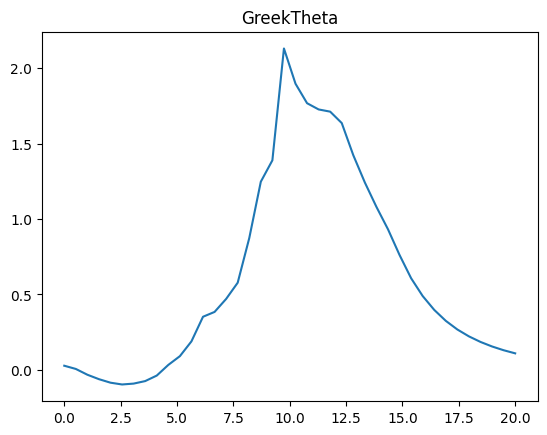

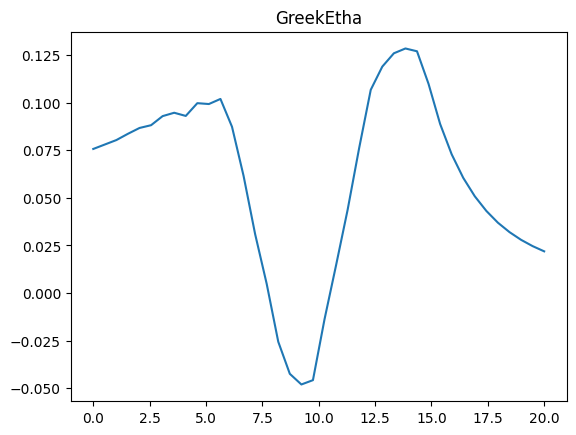

In [53]:
Number=40
Strikes=np.linspace(0,20,Number)
Thetaplot=np.zeros(Number)
Ethaplot=np.zeros(Number)
for i in range(Number):
    Thetaplot[i]= NeuralTheta(10, Strikes[i], 0.5, 0.1,3,0.5, 0.2, 0.5, 0.04, 0.01)
    Ethaplot[i]= NeuralEtha(10, Strikes[i], 0.5, 0.1,3,0.5, 0.2, 0.5, 0.04, 0.01)
plt.plot(Strikes,Thetaplot)
plt.title('GreekTheta')
plt.show()
plt.plot(Strikes,Ethaplot)
plt.title('GreekEtha')
plt.show()

In [57]:
import lightgbm as lgb

# Convert the data to the LightGBM format
train_data = lgb.Dataset(X_train_scaled, label=y_train)
test_data = lgb.Dataset(X_test_scaled, label=y_test)

# Set the hyperparameters for the LightGBM model
params = {
    'objective': 'regression',  # For regression task
    'metric': 'mse',  # Mean squared error (MSE) for evaluation
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'learning_rate': 0.01,
    'num_leaves': 31,  # Maximum number of leaves in one tree
    'feature_fraction': 0.9,  # Controls the proportion of features used per iteration
    'bagging_fraction': 0.8,  # Controls the proportion of data points used per iteration
    'bagging_freq': 5,  # Frequency for bagging
    'verbose': -1,  # No print information during training
    'seed': 42
}

# Train the LightGBM model
num_round = 10000  # Number of boosting iterations
lgb_model = lgb.train(params, train_data, num_round, valid_sets=[train_data, test_data], early_stopping_rounds=10, verbose_eval=10)

# Make predictions using the trained model
y_pred = lgb_model.predict(X_test_scaled, num_iteration=lgb_model.best_iteration)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 10 rounds
[10]	training's l2: 14.315	valid_1's l2: 13.9475
[20]	training's l2: 12.1504	valid_1's l2: 11.841
[30]	training's l2: 10.1096	valid_1's l2: 9.85255
[40]	training's l2: 8.54294	valid_1's l2: 8.33074
[50]	training's l2: 7.39532	valid_1's l2: 7.21345
[60]	training's l2: 6.2225	valid_1's l2: 6.07218
[70]	training's l2: 5.29813	valid_1's l2: 5.17294
[80]	training's l2: 4.42783	valid_1's l2: 4.32623
[90]	training's l2: 3.77919	valid_1's l2: 3.69361
[100]	training's l2: 3.20429	valid_1's l2: 3.13322
[110]	training's l2: 2.74771	valid_1's l2: 2.68915
[120]	training's l2: 2.29545	valid_1's l2: 2.24775
[130]	training's l2: 1.99538	valid_1's l2: 1.95566
[140]	training's l2: 1.70474	valid_1's l2: 1.67218
[150]	training's l2: 1.4855	valid_1's l2: 1.45836
[160]	training's l2: 1.2653	valid_1's l2: 1.24283
[170]	training's l2: 1.08055	valid_1's l2: 1.06266
[180]	training's l2: 0.952605	valid_1's l2: 0.937965
[190]	training's l2: 0.814281	val

In [50]:
# Calculate R-squared
r2 = r2_score(y_test, y_pred)

In [58]:
print(r2)

0.9990767718752913


In [59]:
def NeuralTheta(S0, K, T, r, k, p,  Theta, Etha, v0, h):
    X = np.array([[S0, r, k, v0, Theta + h, Etha, p, K, T]])
    Y = np.array([[S0, r, k, v0, Theta - h, Etha, p, K, T]])
    X_scaled=scaler.transform(X)
    Y_scaled=scaler.transform(Y)

    Call = lgb_model.predict(X_scaled,num_iteration=lgb_model.best_iteration)
    Call2 =lgb_model.predict(Y_scaled,num_iteration=lgb_model.best_iteration)
    GreekTheta = (Call - Call2) / (2 * h)
    return GreekTheta

def NeuralEtha(S0,  K, T, r, k, p,  Theta, Etha, v0, h):
    X=np.array([[S0, r, k, v0, Theta, Etha+h, p, K,T ]])
    Y=np.array([[S0, r, k, v0, Theta, Etha-h, p, K,T]])
    X_scaled=scaler.transform(X)
    Y_scaled=scaler.transform(Y)

    Call = lgb_model.predict(X_scaled,num_iteration=lgb_model.best_iteration)
    Call2 = lgb_model.predict(Y_scaled,num_iteration=lgb_model.best_iteration)
    GreekEtha = (Call - Call2) / (2 * h)
    return GreekEtha

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but 

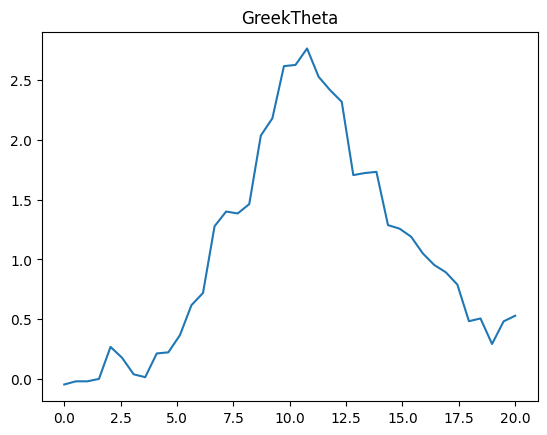

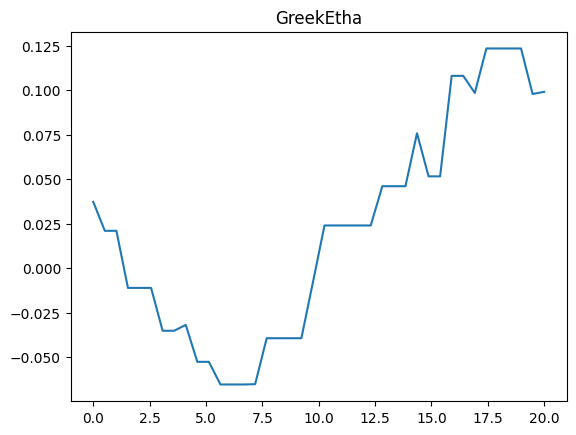

In [60]:
Number=40
Strikes=np.linspace(0,20,Number)
Thetaplot=np.zeros(Number)
Ethaplot=np.zeros(Number)
for i in range(Number):
    Thetaplot[i]= NeuralTheta(10, Strikes[i], 0.5, 0.1,3,0.5, 0.2, 0.5, 0.04, 0.01)
    Ethaplot[i]= NeuralEtha(10, Strikes[i], 0.5, 0.1,3,0.5, 0.2, 0.5, 0.04, 0.01)
plt.plot(Strikes,Thetaplot)
plt.title('GreekTheta')
plt.show()
plt.plot(Strikes,Ethaplot)
plt.title('GreekEtha')
plt.show()